In [43]:
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]

single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

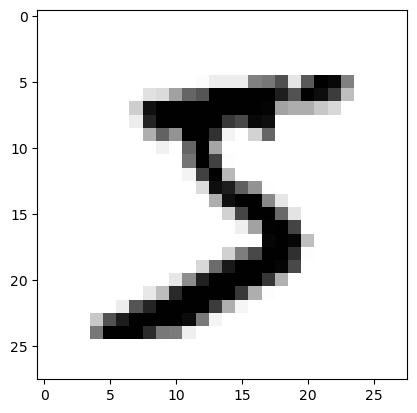

In [10]:
plt.imshow(single_image, cmap='gray_r')

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [14]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [17]:
scaled_image = x_train[0]

In [18]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

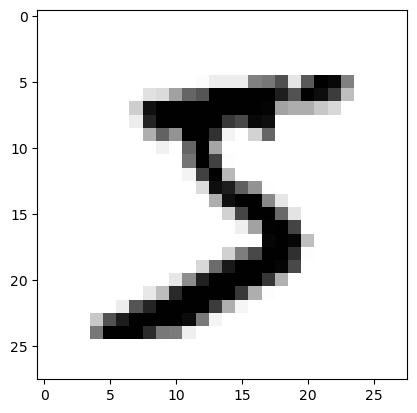

In [19]:
plt.imshow(scaled_image, cmap='gray_r')

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [24]:
from keras.models import Sequential

In [26]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# 2d to 1d
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))

model.add(Dense(10,activation='softmax')) # output layer

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [32]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 23s 11ms/step - loss: 0.1339 - accuracy: 0.9601
Epoch 2/2
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0480 - accuracy: 0.9856


In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 13s 38ms/step - loss: 0.0408 - accuracy: 0.9865


[0.04083218052983284, 0.9865000247955322]

In [35]:
from sklearn.metrics import classification_report

In [44]:
predictions= model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 13s 40ms/step


In [40]:
y_cat_test
predictions

array([[3.1642771e-09, 2.6726088e-10, 1.9787591e-07, ..., 9.9999744e-01,
        4.7763283e-08, 9.7939483e-07],
       [1.3547623e-08, 6.8728804e-07, 9.9999923e-01, ..., 5.0526263e-12,
        2.3486098e-08, 2.0514770e-12],
       [9.1326189e-07, 9.9977040e-01, 5.0751560e-06, ..., 3.6039164e-05,
        4.4965560e-05, 8.5745410e-07],
       ...,
       [6.9755174e-11, 1.5736124e-07, 1.3027591e-09, ..., 1.9564866e-05,
        1.0740268e-05, 1.4377139e-05],
       [3.2056799e-09, 8.9564606e-12, 2.1307298e-11, ..., 1.7640911e-10,
        3.3595259e-04, 5.6032501e-08],
       [5.8076793e-08, 2.8186681e-10, 1.1356525e-07, ..., 1.7637241e-12,
        3.3097852e-08, 6.0251457e-11]], dtype=float32)

In [45]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.97      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

